# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

**INTEGRANTES:** DIEGO ALEXANDER MARTÍNEZ GÓMEZ -
             WILSON ENRIQUE LADINO SONSA

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [1]:
!pip install folium

In [33]:
# cargar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import folium
from folium.plugins import HeatMap

1. Análisis exploratorio de datos


In [34]:
# Cargar base de datos
ruta='/content/accidents-1.csv'
df=pd.read_csv(ruta,sep=';',decimal='.')

In [35]:
# Validar columnas
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [36]:
# Validar tipo de datos
df.dtypes

,0
DATE,object
TIME,object
BOROUGH,object
ZIP CODE,float64
LATITUDE,float64
LONGITUDE,float64
ON STREET NAME,object
NUMBER OF PEDESTRIANS INJURED,int64
NUMBER OF PEDESTRIANS KILLED,int64
NUMBER OF CYCLIST INJURED,int64


In [37]:
# Información datos nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null  int64  
 12  NUMBER OF MOTORIST KILLED     

In [38]:
# Validar las primeras 5 columnas
df.head(10)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
5,08/20/2019,7:15,QUEENS,11354.0,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4191802,Sedan,NaN,NaN,NaN,NaN
6,08/19/2019,12:00,QUEENS,11422.0,40.669327,-73.735330,241 STREET,0,0,0,...,Unspecified,NaN,NaN,NaN,4191196,Sedan,Sedan,NaN,NaN,NaN
7,09/22/2018,11:25,BRONX,10465.0,40.836227,-73.822920,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4004118,Sedan,NaN,NaN,NaN,NaN
8,09/22/2018,15:56,BRONX,10451.0,40.819298,-73.921880,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3985745,Sedan,NaN,NaN,NaN,NaN
9,08/18/2019,12:43,BRONX,10451.0,NaN,NaN,EAST 149 STREET,0,0,0,...,Passing Too Closely,NaN,NaN,NaN,4191092,Sedan,Sedan,NaN,NaN,NaN


In [39]:
# Identificar cantidad valores nulos
valores_nulos = df.isna().sum()
print(valores_nulos)

DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: int64


In [40]:
# identificar cantidad valores no nulos
valores_no_nulos = df.notna().sum()
print(valores_no_nulos)

DATE                             238522
TIME                             238522
BOROUGH                          238522
ZIP CODE                         238452
LATITUDE                         231544
LONGITUDE                        231544
ON STREET NAME                   153918
NUMBER OF PEDESTRIANS INJURED    238522
NUMBER OF PEDESTRIANS KILLED     238522
NUMBER OF CYCLIST INJURED        238522
NUMBER OF CYCLIST KILLED         238522
NUMBER OF MOTORIST INJURED       238522
NUMBER OF MOTORIST KILLED        238522
CONTRIBUTING FACTOR VEHICLE 1    237638
CONTRIBUTING FACTOR VEHICLE 2    198514
CONTRIBUTING FACTOR VEHICLE 3     13072
CONTRIBUTING FACTOR VEHICLE 4      2856
CONTRIBUTING FACTOR VEHICLE 5       792
COLLISION_ID                     238522
VEHICLE TYPE CODE 1              236801
VEHICLE TYPE CODE 2              182932
VEHICLE TYPE CODE 3               12301
VEHICLE TYPE CODE 4                2716
VEHICLE TYPE CODE 5                 753
dtype: int64


In [41]:
# Describir incluyendo formato object
df.describe(include='object')

,DATE,TIME,BOROUGH,ON STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,238522,238522,238522,153918,237638,198514,13072,2856,792,236801,182932,12301,2716,753
unique,601,1440,5,5221,55,54,31,9,6,447,459,84,38,21
top,11/15/2018,0:00,BROOKLYN,ATLANTIC AVENUE,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Sedan,Sedan,Sedan,Sedan,Sedan
freq,708,3657,76253,1797,59307,164775,12522,2784,776,86879,62540,4966,1187,310


2. Limpieza del dataframe

In [42]:
# Identificar la moda
moda_BOROUGH=df['BOROUGH'].mode()
print(moda_BOROUGH)
moda_BOROUGH.iloc[0]

0    BROOKLYN
Name: BOROUGH, dtype: object


'BROOKLYN'

In [43]:
# Calcular moda del ZIP CODE por cada BOROUGH (Municipio)
def fill_zip_mode(group):
    mode_value = group['ZIP CODE'].mode()  # Obtener la moda de ZIP CODE
    if not mode_value.empty:
        group['ZIP CODE'].fillna(mode_value.iloc[0], inplace=True)  # Llenar valores nulos con la moda
    return group

# Aplicar la función para rellenar valores nulos de ZIP CODE usando la moda de BOROUGH
df = df.groupby('BOROUGH', group_keys=False).apply(fill_zip_mode)


<ipython-input-43-cbe50ca84cf7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  group['ZIP CODE'].fillna(mode_value.iloc[0], inplace=True)  # Llenar valores nulos con la moda
<ipython-input-43-cbe50ca84cf7>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to sile

In [14]:
# Imprimir 50 primeros registros
df.head(50)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123.0,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962.0,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132.0,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962.0,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111.0,Sedan,Sedan,NaN,NaN,NaN
5,08/20/2019,7:15,QUEENS,11354.0,NaN,NaN,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4191802.0,Sedan,NaN,NaN,NaN,NaN
6,08/19/2019,12:00,QUEENS,11422.0,40.669327,-73.735330,241 STREET,0,0,0,...,Unspecified,NaN,NaN,NaN,4191196.0,Sedan,Sedan,NaN,NaN,NaN
7,09/22/2018,11:25,BRONX,10465.0,40.836227,-73.822920,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4004118.0,Sedan,NaN,NaN,NaN,NaN
8,09/22/2018,15:56,BRONX,10451.0,40.819298,-73.921880,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3985745.0,Sedan,NaN,NaN,NaN,NaN
9,08/18/2019,12:43,BRONX,10451.0,NaN,NaN,EAST 149 STREET,0,0,0,...,Passing Too Closely,NaN,NaN,NaN,4191092.0,Sedan,Sedan,NaN,NaN,NaN


In [46]:
# Limpiar ZIP CODE con la moda dentro de cada BOROUGH
df['ZIP CODE'] = df.groupby('BOROUGH')['ZIP CODE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x.median()))

In [47]:
# Convertir la columna 'LONGITUDE' a numérica
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# Limpiar LATITUDE y LONGITUDE con la media dentro de cada BOROUGH
df['LATITUDE'] = df.groupby('BOROUGH')['LATITUDE'].transform(lambda x: x.fillna(x.mean()))
df['LONGITUDE'] = df.groupby('BOROUGH')['LONGITUDE'].transform(lambda x: x.fillna(x.mean()))

In [48]:
# Limpiar ON STREET NAME con "UNKNOWN"
df['ON STREET NAME'] = df['ON STREET NAME'].fillna("UNKNOWN")

In [49]:
# Limpiar los factores contribuyentes con "Unspecified"
for col in ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
            'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
            'CONTRIBUTING FACTOR VEHICLE 5']:
    df[col] = df[col].fillna("Unspecified")

In [50]:
# Limpiar los tipos de vehículos con "Unknown"
for col in ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
            'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
            'VEHICLE TYPE CODE 5']:
    df[col] = df[col].fillna("Unknown")

In [51]:
# Verificar que no queden valores nulos
missing_values_after = df.isnull().sum()
missing_values_after[missing_values_after > 0]

,0


In [52]:
# Verificar que no haya valores nulos
valores_nulos = df.isna().sum()
print(valores_nulos)

DATE                             0
TIME                             0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [X] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [x] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [ ] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [x] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [ ] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [x] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.

**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

En el primer semestre de cada año, se ve una disminución de la cantidad de accidentes, sin embargo, esto tiende a aumentar a partir desde el segundo trimestre, por lo que el aumento se da posterior al primer trimestre de cada año.

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


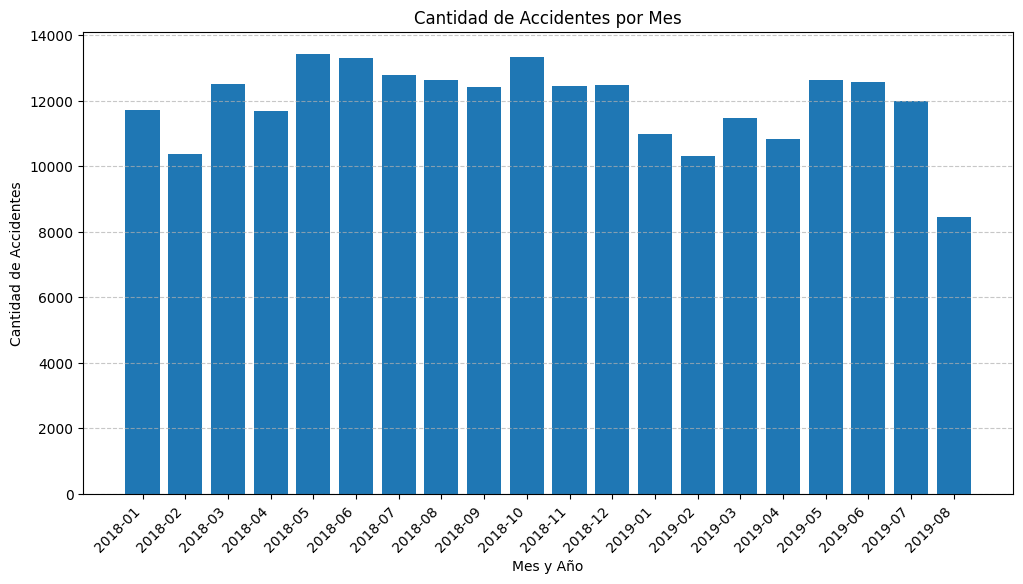

In [53]:
# Solución propuesta

# Convertir la columna DATE a formato datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y', errors='coerce')
# Crear una nueva columna con el mes y año
df['MONTH_YEAR'] = df['DATE'].dt.to_period('M')
# Agrupación de cantidad de accidentes por mes
accidents_per_month = df.groupby('MONTH_YEAR')['COLLISION_ID'].count()
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(accidents_per_month.index.astype(str), accidents_per_month.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mes y Año')
plt.ylabel('Cantidad de Accidentes')
plt.title('Cantidad de Accidentes por Mes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

### Exjercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

De acuerdo con el análisis realizado se identifica que la mayoría de accidentes se presenta a la madrugada a las 00:00.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

<ipython-input-54-ff338b8ca62f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette="Blues")


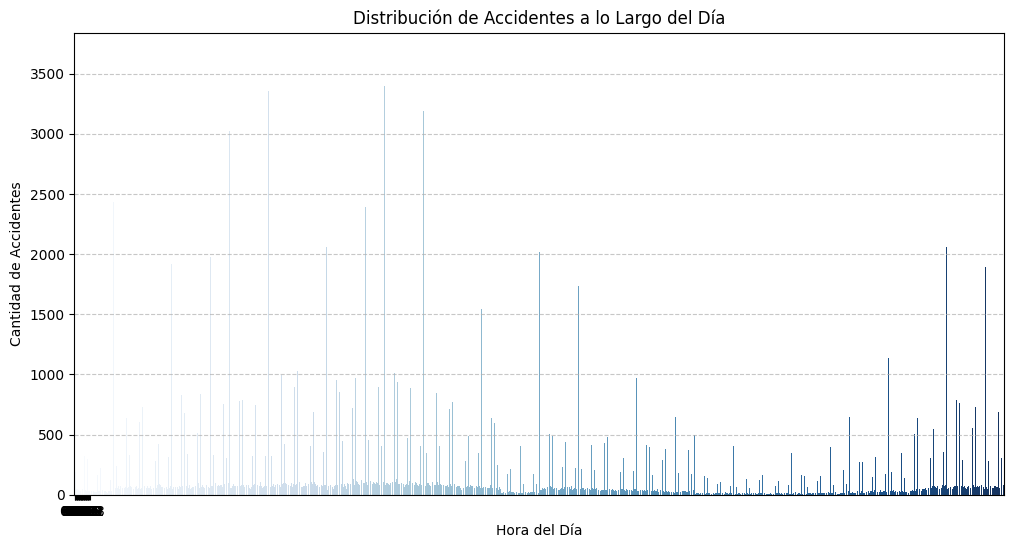

In [54]:
# Solución propuesta

# Crear la columna HOUR
df['HOUR'] = df['TIME']
# Conteo de accidentes por hora
hourly_accidents = df['HOUR'].value_counts().sort_index()
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_accidents.index, y=hourly_accidents.values, palette="Blues")
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')
plt.title('Distribución de Accidentes a lo Largo del Día')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

El número de accidentes varia de lunes a viernes, donde el viernes es el día donde se registran más accidentes. En cuando a los fines de semana, el sábado y domingo son los días donde se evidencian una disminución mínima de accidentes.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

<ipython-input-56-13b95a5a5e22>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_accidents.index, y=weekly_accidents.values, palette="coolwarm")


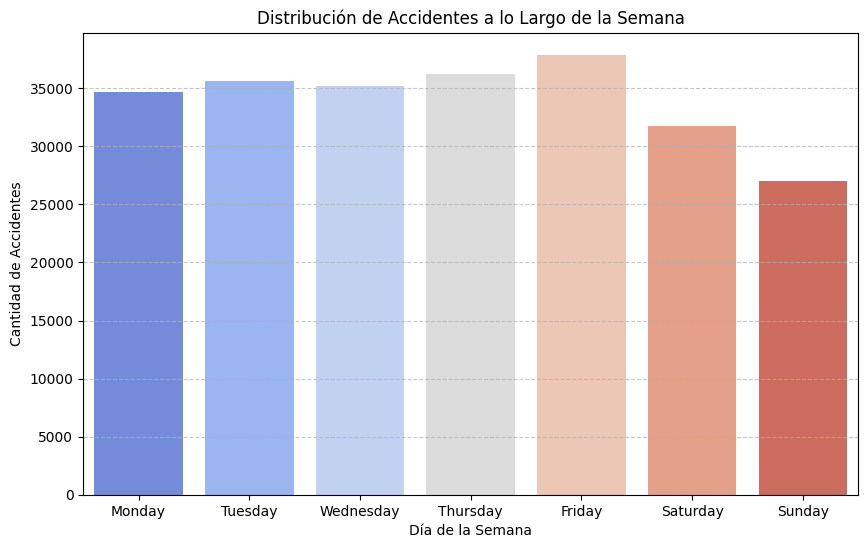

In [56]:
# Solución propuesta

# Crear la columna DÍA DE LA SEMANA
df['DÍA DE LA SEMANA'] = df['DATE'].dt.day_name()
# Conteo de accidentes por día de la semana
weekly_accidents = df['DÍA DE LA SEMANA'].value_counts()
# Ordenar los días de la semana
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_accidents = weekly_accidents.reindex(ordered_days)
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_accidents.index, y=weekly_accidents.values, palette="coolwarm")
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Accidentes')
plt.title('Distribución de Accidentes a lo Largo de la Semana')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

los municipios de BROOKLYN y QUEENS, son donde se evidencia más cantidad de accidentes, sin embargo, por milla cuadrada, MANHATTAN presenta la mayor cantidad de accidentes,  en términos de frecuencia de accidentes en relación con el área, Manhattan es el lugar más peligroso para conducir.

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

<ipython-input-63-d97e723e27a9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_accidents.index, y=borough_accidents.values, palette="Blues")


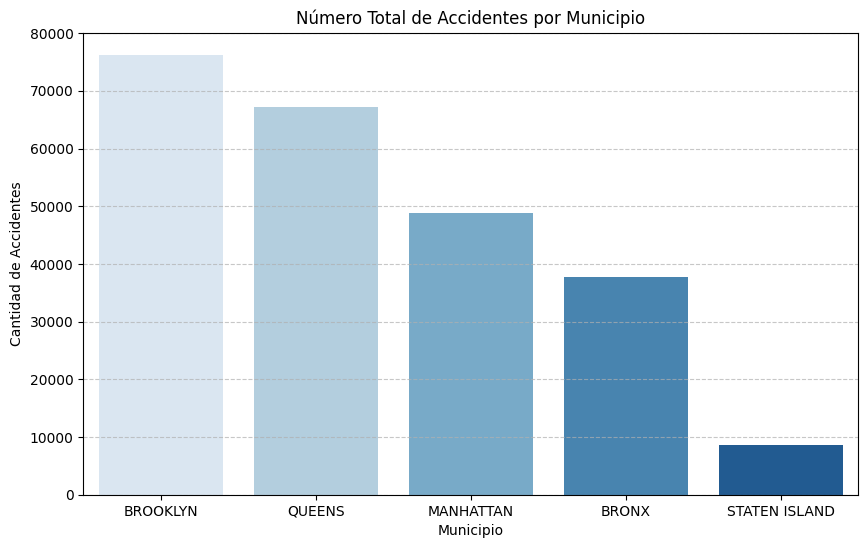

<ipython-input-63-d97e723e27a9>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_accidents_per_mile_df.index, y=borough_accidents_per_mile_df['Accidents per Square Mile'], palette="Reds")


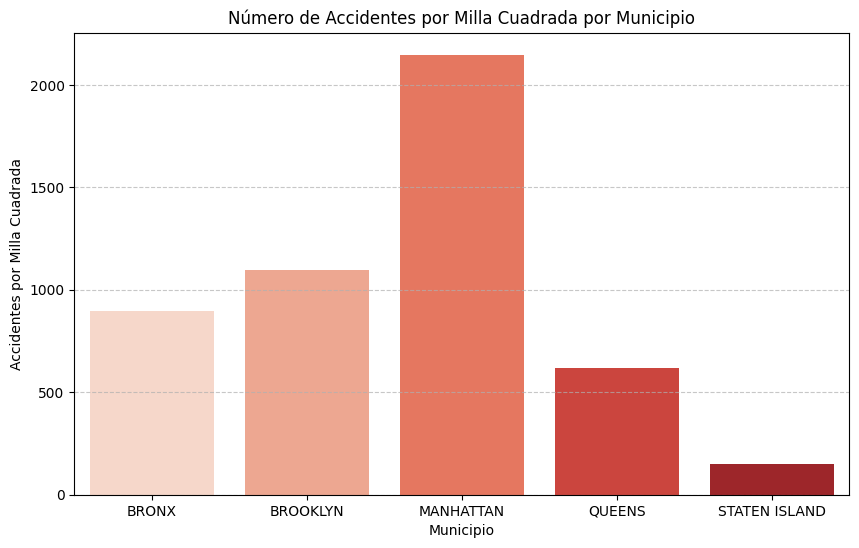

In [63]:
# Solución propuesta

# Conteo del total de accidentes por municipio
borough_accidents = df['BOROUGH'].value_counts()

# Total de accidentes por municipio
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_accidents.index, y=borough_accidents.values, palette="Blues")
plt.xlabel('Municipio')
plt.ylabel('Cantidad de Accidentes')
plt.title('Número Total de Accidentes por Municipio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Definir la superficie de cada municipio en millas cuadradas
borough_areas = {
    "BRONX": 42.0,
    "BROOKLYN": 69.4,
    "MANHATTAN": 22.7,
    "QUEENS": 108.7,
    "STATEN ISLAND": 58.5
}

# Número de accidentes por milla cuadrada
borough_accidents_per_mile = {b: borough_accidents[b] / borough_areas[b] for b in borough_areas if b in borough_accidents}
borough_accidents_per_mile_df = pd.DataFrame.from_dict(borough_accidents_per_mile, orient='index', columns=['Accidents per Square Mile'])

# Gráfico Accidentes por milla cuadrada
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_accidents_per_mile_df.index, y=borough_accidents_per_mile_df['Accidents per Square Mile'], palette="Reds")
plt.xlabel('Municipio')
plt.ylabel('Accidentes por Milla Cuadrada')
plt.title('Número de Accidentes por Milla Cuadrada por Municipio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

BROOKLYN y QUEEN presentan la mayor incidencia en accidentes presentados a las 00:00 y a las 17:00.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

In [65]:
# hora con más accidentes por municipio
borough_peak_hours = df.groupby('BOROUGH')['TIME'].agg(lambda x: x.value_counts().idxmax())

# Agrupación de la cantidad de accidentes en la hora pico de cada municipio
borough_peak_counts = df.groupby('BOROUGH')['TIME'].agg(lambda x: x.value_counts().max())

# Crear un DataFrame con los resultados
borough_peak_df = pd.DataFrame({'Peak Hour': borough_peak_hours, 'Accident Count': borough_peak_counts})

# Ordenar cantidad de accidentes en hora pico
borough_peak_df = borough_peak_df.sort_values(by='Accident Count', ascending=False)

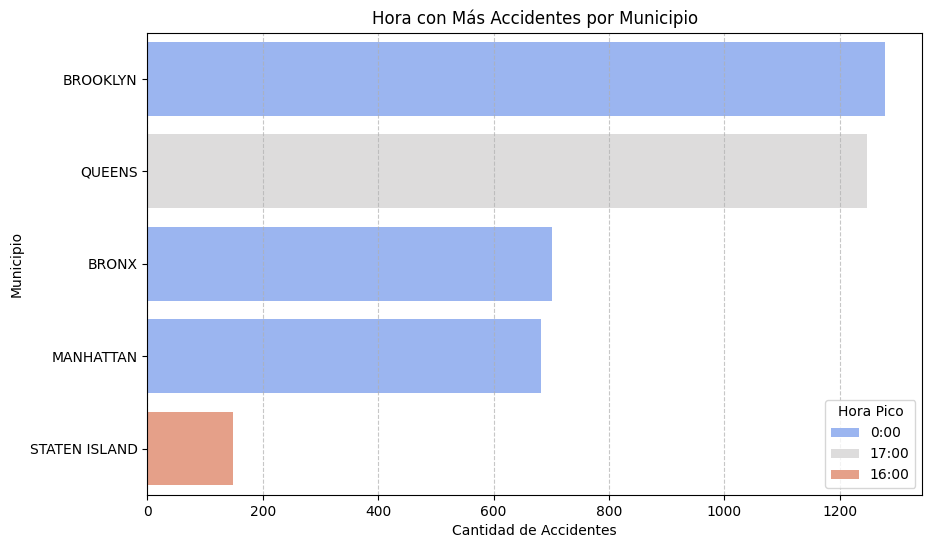

In [66]:
# gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(y=borough_peak_df.index, x=borough_peak_df['Accident Count'], hue=borough_peak_df['Peak Hour'], palette="coolwarm")
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Municipio')
plt.title('Hora con Más Accidentes por Municipio')
plt.legend(title='Hora Pico')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

En el top 5 de los factores que causan la mayoría de accidentes:

1. Distracción del conductor
2. Falta al ceder el paso
3. Seguir demasiado cerca
4. Retroceder de forma imprudente
5. Pasar demasiado cerca

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

<ipython-input-67-33d9511f2bdd>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_factors.index, x=top_factors.values, palette="Reds_r")


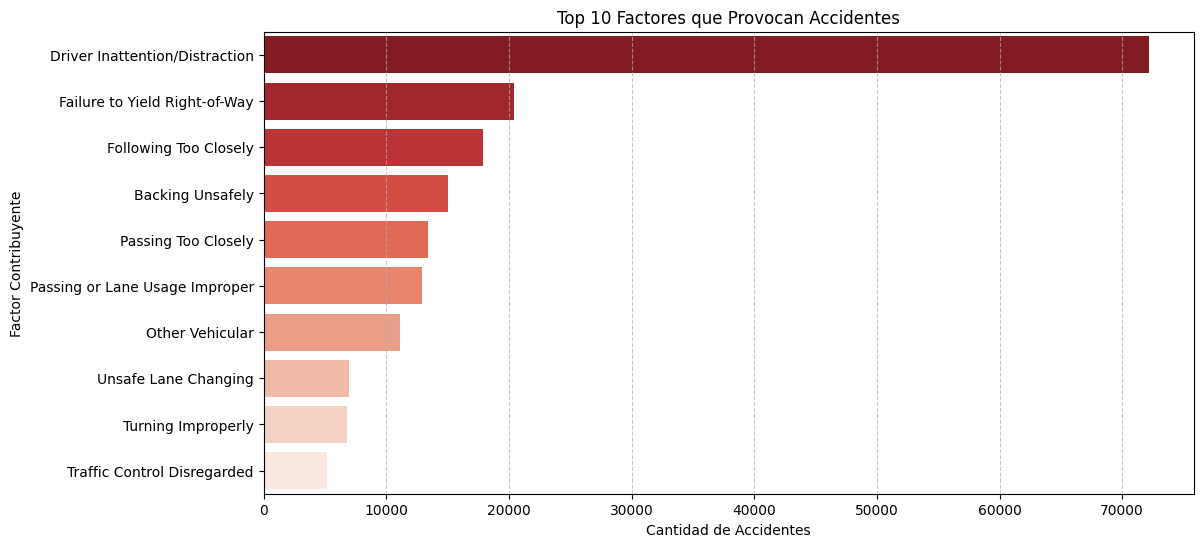

In [67]:
# Solución propuesta

# Seleccionar las columnas de factores contribuyentes
factor_columns = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                  'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                  'CONTRIBUTING FACTOR VEHICLE 5']

# Concatenar los factores
factors = pd.concat([df[col] for col in factor_columns], axis=0).reset_index(drop=True)

# Contar la frecuencia de cada factor excluyendo nulos
factor_counts = factors[factors.notna() & (factors != "Unspecified")].value_counts()

# top 10 principales factores
top_factors = factor_counts.nlargest(10)

# gráfico de barras con los factores principales
plt.figure(figsize=(12, 6))
sns.barplot(y=top_factors.index, x=top_factors.values, palette="Reds_r")
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Factor Contribuyente')
plt.title('Top 10 Factores que Provocan Accidentes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

En el top 3 de los vehículos que esta más involucrados en accidentes están:

1. SEDAN
2. FAMILIAR
3. VEHÍCULO DE PASAJEROS

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

<ipython-input-68-300eb55a7da6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_vehicles.index, x=top_vehicles.values, palette="Blues_r")


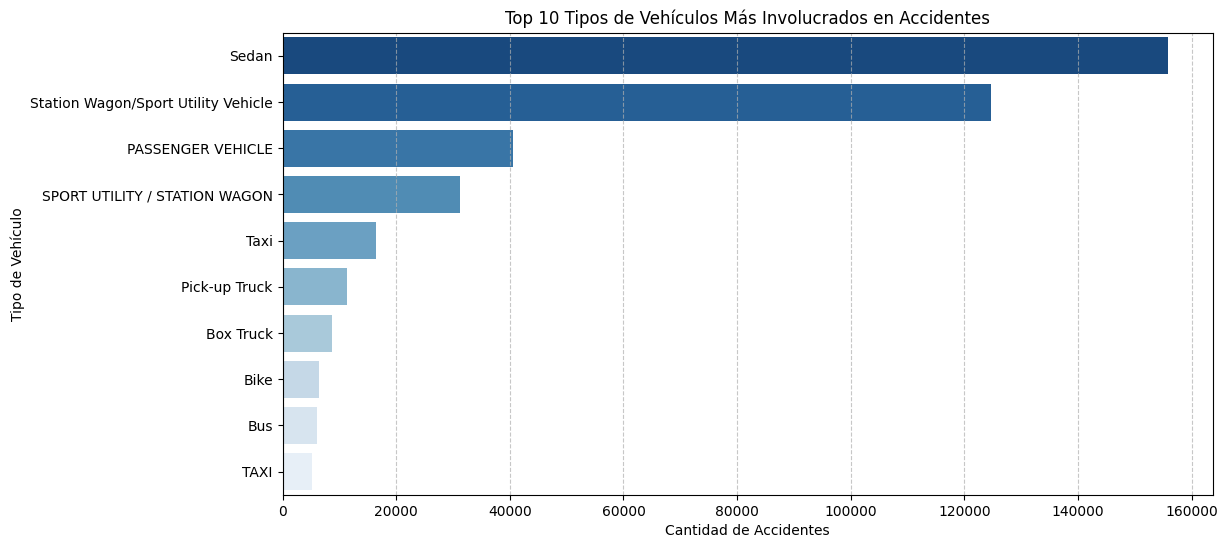

In [68]:
# Solución propuesta

# Seleccionar las columnas de tipos de vehículos
vehicle_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Concatenar los tipos de vehículos
vehicles = pd.concat([df[col] for col in vehicle_columns], axis=0).reset_index(drop=True)

# Conteo de la frecuencia de cada tipo de vehículo excluyendo nulos
vehicle_counts = vehicles[vehicles.notna() & (vehicles != "Unknown")].value_counts()

# Top 10 principales tipos de vehículos
top_vehicles = vehicle_counts.nlargest(10)

# Gráfico de barras con los tipos de vehículos más involucrados
plt.figure(figsize=(12, 6))
sns.barplot(y=top_vehicles.index, x=top_vehicles.values, palette="Blues_r")
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Tipo de Vehículo')
plt.title('Top 10 Tipos de Vehículos Más Involucrados en Accidentes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [x] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

De acuerdo con el resultado del estudio, se determina que para el primer trimiste del año 2019, la mayor causa de accidentalidad sigue siendo la distracción del conductor, lo más recomendable es realizar campañas de concienciación sobre el uso de dispositivos utilizados al momento de conducir como celulares y pantallas. Además, se recomienda realizar auditorías o puntos de control donde se presenten más accidentes y muertes, esto con el fin de generar un mayor seguimiento del tránsito vehicular en las zonas más vulnerables.


> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

<ipython-input-69-793210e0708d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_factors_2019.index, x=top_factors_2019.values, palette="Reds_r")


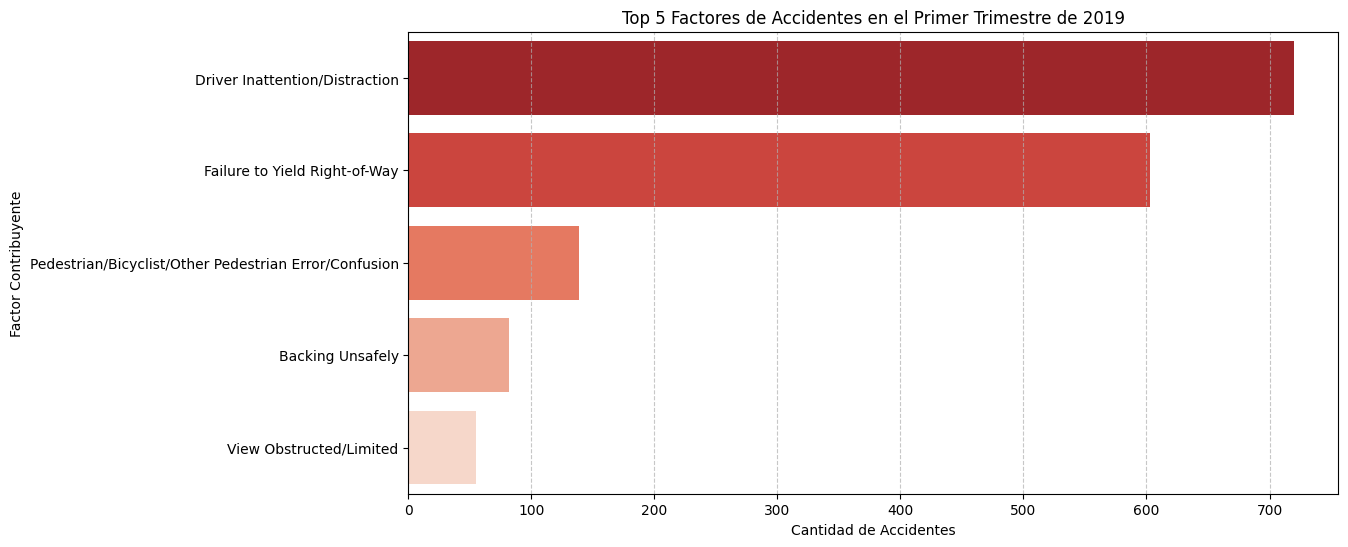

In [69]:
# Filtrar los datos del primer trimestre de 2019
df_2019_q1 = df[(df['DATE'].dt.year == 2019) & (df['DATE'].dt.month.isin([1, 2, 3]))]

# Filtrar solo accidentes con peatones o ciclistas lesionados/muertos
df_2019_q1 = df_2019_q1[(df_2019_q1['NUMBER OF PEDESTRIANS INJURED'] > 0) |
                         (df_2019_q1['NUMBER OF PEDESTRIANS KILLED'] > 0) |
                         (df_2019_q1['NUMBER OF CYCLIST INJURED'] > 0) |
                         (df_2019_q1['NUMBER OF CYCLIST KILLED'] > 0)]

# Identificar las principales causas de accidentes en 2019 Q1
factor_columns = ['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
                  'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
                  'CONTRIBUTING FACTOR VEHICLE 5']

# Concatenar las causas de accidentes en una sola serie
factors_2019_q1 = pd.concat([df_2019_q1[col] for col in factor_columns], axis=0).reset_index(drop=True)

# Conteo frecuencia de cada causa excluyendo valores nulos
factor_counts_2019 = factors_2019_q1[factors_2019_q1.notna() & (factors_2019_q1 != "Unspecified")].value_counts()

# Top 5 principales factores
top_factors_2019 = factor_counts_2019.nlargest(5)

# Gráfico de barras con los factores principales de accidentes en 2019 Q1
plt.figure(figsize=(12, 6))
sns.barplot(y=top_factors_2019.index, x=top_factors_2019.values, palette="Reds_r")
plt.xlabel('Cantidad de Accidentes')
plt.ylabel('Factor Contribuyente')
plt.title('Top 5 Factores de Accidentes en el Primer Trimestre de 2019')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

Entre los vehículos que más provocan muertes están:

1. FAMILIAR
2. SEDAN
3. VEHÍCULO DE PASAJEROS
4. DEPORTIVO
5. MOTOCICLETA

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

<ipython-input-70-d52677f08cae>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_fatal_vehicles.index, x=top_fatal_vehicles.values, palette="Reds_r")


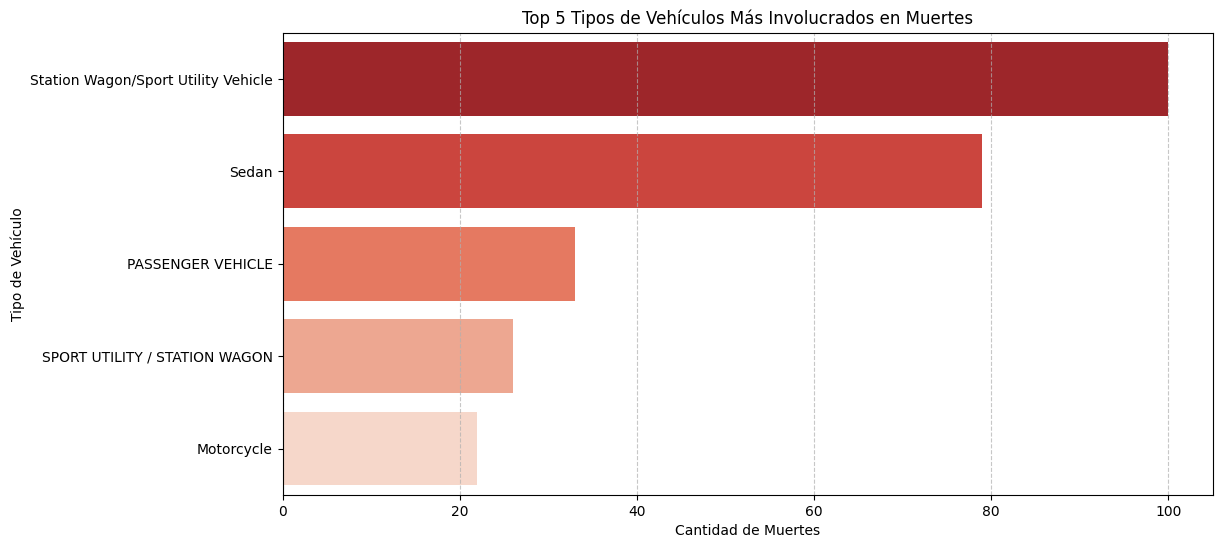

In [70]:
# Solución propuesta

# Crear una nueva columna con el número total de muertes en el accidente
df['TOTAL_FATALITIES'] = df['NUMBER OF PEDESTRIANS KILLED'] + df['NUMBER OF CYCLIST KILLED'] + df['NUMBER OF MOTORIST KILLED']

# Seleccionar las columnas de tipos de vehículos
vehicle_columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
                   'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Convertir las columnas de vehículos a una sola columna
vehicles_df = df.melt(id_vars=['TOTAL_FATALITIES'], value_vars=vehicle_columns, value_name='Vehicle_Type')

# Filtrar valores nulos
vehicles_df = vehicles_df.dropna(subset=['Vehicle_Type'])
vehicles_df = vehicles_df[vehicles_df['Vehicle_Type'] != "Unknown"]

# Agrupar por tipo de vehículo y sumar las muertes
vehicle_fatalities = vehicles_df.groupby('Vehicle_Type')['TOTAL_FATALITIES'].sum().sort_values(ascending=False)

# Top 5 principales tipos de vehículos involucrados en muertes
top_fatal_vehicles = vehicle_fatalities.head(5)

# Gráfico de barras con los 5 principales vehículos involucrados en muertes
plt.figure(figsize=(12, 6))
sns.barplot(y=top_fatal_vehicles.index, x=top_fatal_vehicles.values, palette="Reds_r")
plt.xlabel('Cantidad de Muertes')
plt.ylabel('Tipo de Vehículo')
plt.title('Top 5 Tipos de Vehículos Más Involucrados en Muertes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
